In [1]:
import numpy as np
import os
import skimage.io as skio
import matplotlib.pyplot as plt
import pandas as pd

indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
tifs_path = os.path.join(indir, "tifs")

In [2]:
# create an empty list to store the tif files
tif_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        tif_list.append(skio.imread(tif_file))

# convert the list to a numpy array
tifs = np.array(tif_list)

C:\Users\Nissim\AppData\Local\Temp\ipykernel_62584\1866065933.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tifs = np.array(tif_list)


In [3]:
tifs.shape

(23,)

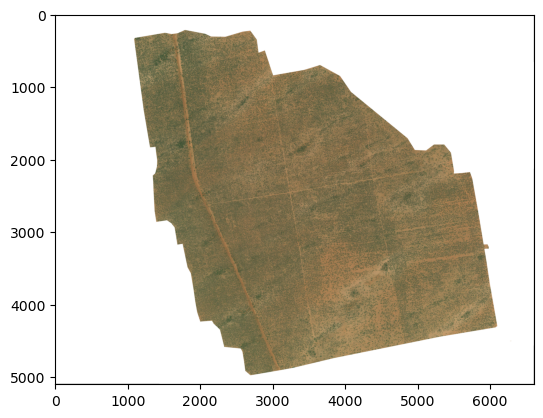

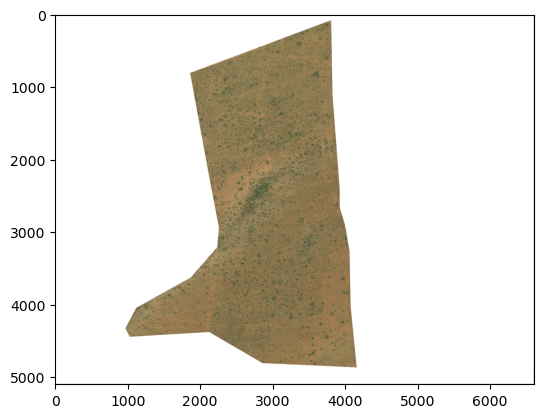

In [4]:
# print out the first two tifs in the array
plt.imshow(tifs[1])
plt.show()

plt.imshow(tifs[22])
plt.show()

In [5]:
tifs[1].shape

(5100, 6600, 4)

In [6]:
# create an empty list to store the patched tif arrays
patched_tifs = []

# loop through all tif files in the folder
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)

        # read the tif file
        tif = skio.imread(tif_file)

        # get the dimensions of the tif array
        tif_height, tif_width, num_channels = tif.shape

        # calculate the number of patches in the x and y directions
        num_x_patches = int(np.ceil(tif_width / 256))
        num_y_patches = int(np.ceil(tif_height / 256))

        # pad each color channel separately
        padded_tif_height = num_y_patches * 256
        padded_tif_width = num_x_patches * 256
        padded_tif = np.zeros((padded_tif_height, padded_tif_width, num_channels), dtype=np.uint8)
        for c in range(num_channels):
            padded_tif_channel = np.zeros((padded_tif_height, padded_tif_width), dtype=np.uint8)
            padded_tif_channel[:tif_height, :tif_width] = tif[:,:,c]
            padded_tif[:,:,c] = padded_tif_channel

        # loop through all patches and append to the patched tif list
        for y in range(num_y_patches):
            for x in range(num_x_patches):
                patch = padded_tif[y*256:(y+1)*256, x*256:(x+1)*256,:]
                patched_tifs.append(patch)

# convert the patched tif list to a numpy array
patched_tifs = np.array(patched_tifs)

C:\Users\Nissim\AppData\Local\Temp\ipykernel_62584\2221209182.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  patched_tifs = np.array(patched_tifs)


ValueError: could not broadcast input array from shape (256,256,3) into shape (256,256)

In [ ]:
patched_tifs.shape

In [7]:
def extract_and_pad_patches(image, patch_size=(256, 256, 3), stride=256):
    patches = []
    height, width, channels = image.shape

    for y in range(0, height, stride):
        for x in range(0, width, stride):
            patch = image[y:y+patch_size[0], x:x+patch_size[1], :]

            # Check if padding is needed
            if patch.shape[0] < patch_size[0] or patch.shape[1] < patch_size[1]:
                pad_height = patch_size[0] - patch.shape[0]
                pad_width = patch_size[1] - patch.shape[1]

                # Pad the patch with zeros (black)
                patch = np.pad(
                    patch,
                    pad_width=((0, pad_height), (0, pad_width), (0, 0)),
                    mode='constant',
                    constant_values=0
                )

            patches.append(patch)

    return patches

In [9]:
# create an empty list to store the tif files
tif_patches_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        img = skio.imread(tif_file)

        # Extract and pad patches from the image
        patches = extract_and_pad_patches(img)
        tif_patches_list.append(patches)

# convert each list of patches to a numpy array
tif_patches_array = [np.array(patches) for patches in tif_patches_list]

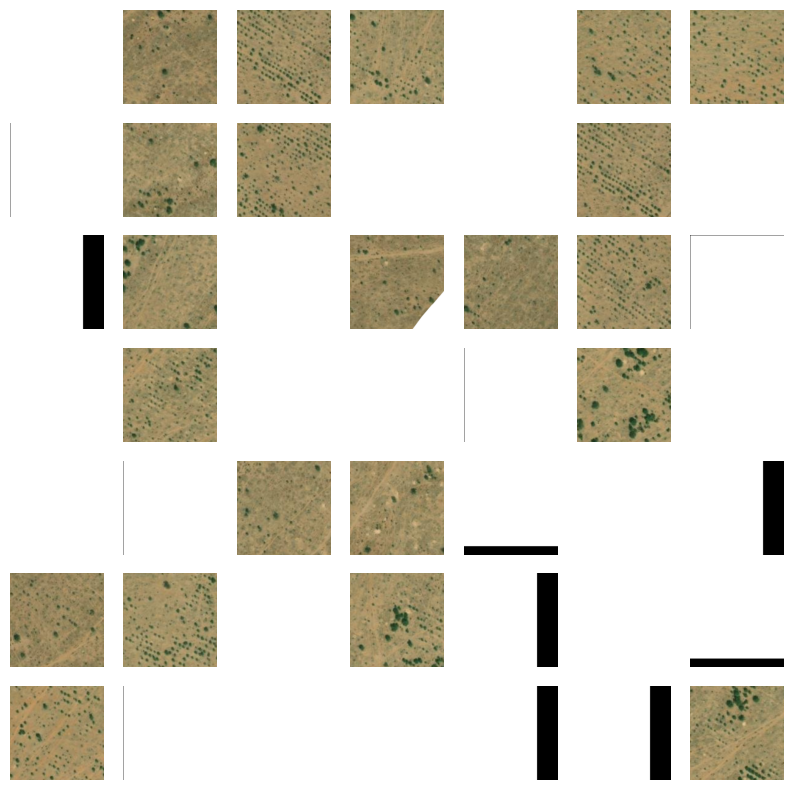

In [15]:
# print 49 random images from tif_patches_array in a 7x7 grid, but with no borders or axes
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(tif_patches_array[0][np.random.randint(0, len(tif_patches_array[0]))])
    ax.axis('off')
plt.show()